# Air Quality Analysis with Confidence Intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

**Ripple Renewable Energy (RRE)operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.**
I've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

I have been requestedto do the following for my analysis:
1. Providing a summary of the mean AQI for the states in which RRE operates.
2. Constructing a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluating which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Constructing a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [110]:
# Import relevant packages

import pandas as pd
import numpy as np

In [111]:
# RUN THIS CELL TO IMPORT YOUR DATA
aqi_data = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

In [114]:
# Explore your DataFrame `aqi`.
print(aqi_data.describe(include='all'))
print(aqi_data['state_name'].value_counts())
print(aqi_data['date_local'].max())
print(aqi_data['date_local'].min())
aqi_data.head(10)


        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6



- The time range this data cover, is one day 1-1-2018.


- The maximimum AQI is 50.0 "Most polluted" and the minimum AQI is 0.000000 "Best air quality".

**Question:** Are all states equally represented in the dataset?

- No the representation of the states in the dataset varies for example California reported 66 sites, but Kentucky reported just 3 sites, and Delaware reported just one site.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Starting with my first deliverable. I will summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [119]:
# Summarize the mean AQI for RRE states.
RRE_states=['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_RRE=aqi_data[aqi_data['state_name'].isin(RRE_states)]
aqi_RRE

# Find the mean aqi for each of the RRE states.
aqi_RRE_mean= aqi_RRE.groupby('state_name').agg({'aqi':'mean', 'state_name':'count'})
aqi_RRE_mean

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

In [121]:
# Import seaborn as sns.
import seaborn as sns 
import matplotlib.pyplot as plt

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Creating an in-line visualization showing the distribution of `aqi` by `state_name`.

<Figure size 700x500 with 0 Axes>

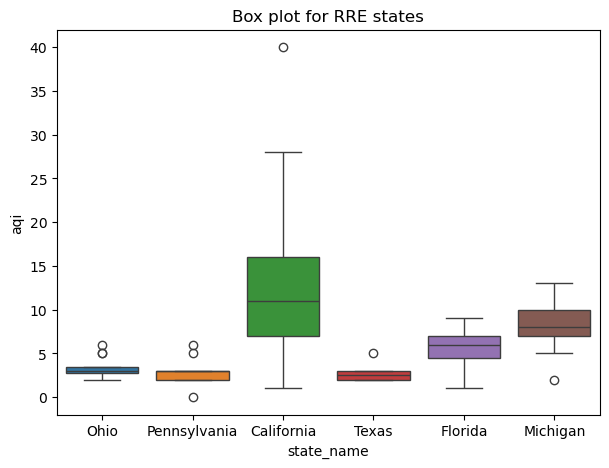

In [123]:
plt.figure(figsize=(7,5))
plt.figure(figsize=(7, 5))
sns.boxplot(x='state_name', y='aqi', data=aqi_RRE, hue='state_name')
plt.title('Box plot for RRE states')
plt.title('Box plot for RRE states')
plt.show()

In [124]:
#Checking Florida's AQI because it's not clear it's above ore below 10 in the box plot
florida_aqi=aqi_RRE[aqi_RRE['state_name']=='Florida']
print(florida_aqi['aqi'].max())

9


- Based on the data and my visualizations, the states I suspect will be most affected by this policy are `California` and `Michigan`.



### Construct a confidence interval for the RRE state with the highest mean AQI

Recalling the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct the sample statistic

Find the mean AQI for the state.

In [128]:
# Find the mean aqi for the state.

california_df=aqi_RRE[aqi_RRE['state_name']=='California']
sample_mean=california_df['aqi'].mean()
sample_mean

12.121212121212121

### Choose The confidence level

The most typical confidence level chosen is 95%; however, we can choose 90% or 99% if we want decrease or increase (respectively) our level of confidence about the result.

In [130]:
# 95% is my confidence interval.
#The associated z-score to 95% confidence level is 1.96

confidence_level=0.95

### Find your margin of error (ME)

Recalling **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate my margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [132]:
# Calculate the margin of error.
import math

# Begin by identifying the z associated with the chosen confidence level.
z_score=1.96

# Next, calculate the standard error.
standard_error=california_df['aqi'].std()/math.sqrt(california_df.shape[0])

# Use the preceding result to calculate the margin of error.
margin_of_error=z_score*standard_error
print(margin_of_error)

1.7614930896609728


### Calculate your interval

Calculateing both a lower and upper limit surrounding the sample mean to create the interval.

In [162]:
# Calculate the confidence interval (upper and lower limits).

upper_limit=sample_mean+margin_of_error
lower_limit=sample_mean-margin_of_error
print(f'95 CI [{lower_limit},{upper_limit}], \n It means that we are confident 95% that the true mean value of AQI for California is within this interval.')


95 CI [10.359719031551148,13.882705210873095], 
 It means that we are confident 95% that the true mean value of AQI for California is within this interval.


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval.

In [136]:
# Import stats from scipy.

from scipy import stats


## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [160]:

# Calculate the confidence interval
lower_limit, upper_limit = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

print(f'The confidence interval limits are:')
print(f'Lower Limit: {lower_limit:.4f}')
print(f'Upper Limit: {upper_limit:.4f}')




## A note for me ##
### For a small size sample example "15" and we want to construct,
### confidence interval for the population mean "This method works just with mean not proportion"
### we will use the t-score instead of z-score "what we used in large sample size cases"
### the using of the t-score is like the z-score, calculating the margin of error, in the 3rd step of constructing confidence intervals.
### margin of error = t-score*Standard Error
### This code is for calculating the t-score
sample_size=15
degrees_of_freedom=sample_size-1
std=35 
mean=430
confidence_level=0.95

alpha=1-confidence_level
t_score= stats.t.ppf(1-alpha/2, degrees_of_freedom)
print(f'The t-score: ',t_score)

The confidence interval limits are:
Lower Limit: 10.3598
Upper Limit: 13.8827
The t-score:  2.1447866879169273


# Conclusion

**Key takeaways from this project**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
* Constructing a confidence interval allowed me to estimate the sample mean AQI with a certain degree of confidence.

**Conveying Insights to External Stakeholders:**

This notebook presents an analytical examination of air quality data, specifically focusing on California's air quality index (AQI). The analysis emphasizes the importance of statistical significance in understanding the reliability of our findings, indicating that observed results are unlikely to be due to chance.

*Key insights include:*

- California's AQI: The observed mean AQI for California highlights the need for focused intervention in this state, as it is a critical area for air quality improvement.

- Confidence Interval Results: A 95% confidence interval calculated from the sample data yielded [10.36, 13.88]. This range indicates a 95% confidence that the population mean AQI for California falls between 10.36 and 13.88, significantly greater than the threshold of 10.

- Impact of Varying Confidence Levels: Altering the confidence level affects the interval size; for instance, a 99% confidence level results in an interval of [9.80, 14.43], demonstrating a wider range.

- Methodological Transparency: The analytical process and methodology used to construct the confidence interval are thoroughly documented in this notebook, ensuring transparency and reproducibility.

- Consideration of Limitations: It is important to acknowledge potential shortcomings, such as the short time period referenced, which may impact the robustness of our conclusions.
